## A) Create MySQL DataBase

In [1]:
import mysql.connector as mysql

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

mydb = mysql.connect(user=user, password=pw, host=host)
mycursor = mydb.cursor()

create_database = "CREATE DATABASE moh_household_health_expenditure"

try:
    print("Execute MySQL create Database!")
    mycursor.execute(create_database)
    mydb.commit()
    print("DataBase Created!")
    
except:
    print("Unexpected Error!")
    exit()

finally:
    mycursor.close()
    mydb.close()



Execute MySQL create Database!
DataBase Created!


## B) Create Table in MySQL DataBase

In [2]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_household_health_expenditure'

cnx = mysql.connect(user=user, password=pw, host=host, database = db)
mycursor = cnx.cursor()

create_table = "CREATE TABLE health_expenditure(period_start VARCHAR(50) NOT NULL, period_end VARCHAR(50) NOT NULL, income_quintile VARCHAR(50) NOT NULL, percentage_expenditure_on_healthcare FLOAT(20) NOT NULL)"

try: 
    print("Execute MySQL create Table!")
    mycursor.execute(create_table)
    cnx.commit()
    print("Create Table Completed!")

except:
    print("Unexpected Error!")
    exit()

finally:
    mycursor.close()
    cnx.close()

Execute MySQL create Table!
Create Table Completed!


## C) Insert Records into MySQL DataBase

In [3]:
import mysql.connector as mysql
import pandas as pd

filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\household_healthcare_expenditure.csv'

df = pd.read_csv(filename)

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_household_health_expenditure'

cnx = mysql.connect(user=user, password=pw, host=host, database=db)
mycursor = cnx.cursor()

for index, col in df.iterrows():
    
    data = {'period_start': col[0],
           'period_end': col[1],
           'income_quintile': col[2],
           'percentage_expenditure_on_healthcare': col[3]}
    
    sql = ("INSERT INTO health_expenditure(period_start, period_end, income_quintile, percentage_expenditure_on_healthcare)"
          "VALUES(%(period_start)s, %(period_end)s, %(income_quintile)s, %(percentage_expenditure_on_healthcare)s)")
    
    mycursor.execute(sql, data)
    print("Adding rows " + str(index))
    cnx.commit()
print("All records are inserted into DataBase!")

mycursor.close()
cnx.close()

Adding rows 0
Adding rows 1
Adding rows 2
Adding rows 3
Adding rows 4
Adding rows 5
Adding rows 6
Adding rows 7
Adding rows 8
Adding rows 9
Adding rows 10
Adding rows 11
Adding rows 12
Adding rows 13
Adding rows 14
Adding rows 15
Adding rows 16
Adding rows 17
All records are inserted into DataBase!


## D) Retrieve Data from MySQL DataBase

***** Welcome to MOH Household Healthcare Expenditure DataBase *****
< 1 > All Households
< 2 > 1st quintile 
< 3 > 2nd quintile
< 4 > 3rd quintile
< 5 > 4th quintile
< 6 > 5th quintile
< 7 > All of the above
----------------------------------------------------------------------------------------
Choose 'ONE' income quintile to view the database: 7


Data Info for All of the Household Healthcare Expenditure
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
period_start                            18 non-null object
period_end                              18 non-null object
income_quintile                         18 non-null object
percentage_expenditure_on_healthcare    18 non-null float64
dtypes: float64(1), object(3)
memory usage: 656.0+ bytes
None

Data for All of the Household Healthcare Expenditure
--------------------------------------------------

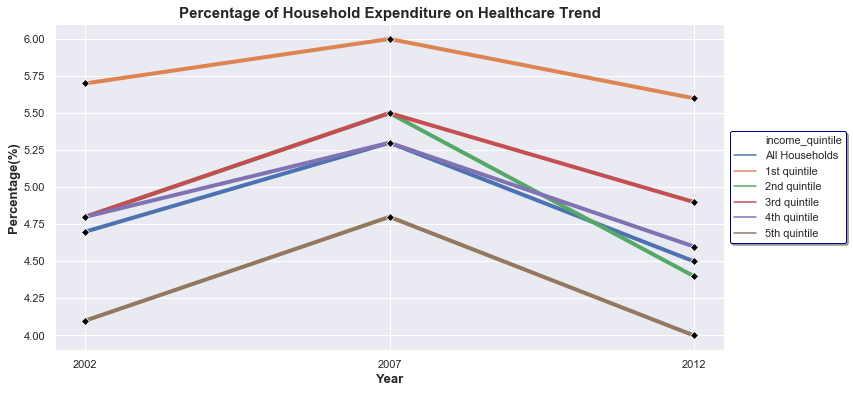

In [13]:
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

################################################ Define Functions #########################################################
def data_info(income_quintile_title, health_expenditure_df1):
    print()
    print("Data Info for " + income_quintile_title)
    print("-----------------------------------------------------------------------------------")
    print(health_expenditure_df1.info())
    print()


def table_of_data(income_quintile_title, health_expenditure_df1):
    print("Data for " + income_quintile_title)
    print("-----------------------------------------------------------------------------------")
    print(health_expenditure_df1)
    print()

    
def descriptive_stat_summary(income_quintile_title, health_expenditure_df1):
    print("Data for " + income_quintile_title)
    print("-----------------------------------------------------------------------------------")
    print(health_expenditure_df1['percentage_expenditure_on_healthcare'].describe())
    print()

def line_graph(income_quintile_title, health_expenditure_df1, color):
    sns.set(style = "darkgrid", rc = {'figure.figsize': (12,6)})
    ax = sns.lineplot(x = 'period_start', y = 'percentage_expenditure_on_healthcare', data = health_expenditure_df1,
                     label = income_quintile_title, linewidth = 4, color = color, marker = 'o', markerfacecolor = 'black')
    ax.set_title("Percentage of Household Expenditure on " + income_quintile_title, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Year", fontsize = 13, fontweight = 'bold')
    ax.set_ylabel("Percentage (%)", fontsize = 13, fontweight = 'bold')
    ax.legend(loc = 'upper left', facecolor = 'white', edgecolor = 'tomato', shadow = True )
    plt.show(ax)

def multiple_line_graph(health_expenditure_df1):
    sns.set(style = "darkgrid", rc = {'figure.figsize': (12,6)})
    ax = sns.lineplot(x = 'period_start', y = 'percentage_expenditure_on_healthcare', hue = 'income_quintile',
                      data = health_expenditure_df1, linewidth = 4, marker = 'D', markerfacecolor = 'black')
    ax.set_title("Percentage of Household Expenditure on Healthcare Trend", fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Year", fontsize = 13, fontweight = 'bold')
    ax.set_ylabel("Percentage(%)", fontsize = 13, fontweight = 'bold')
    ax.legend(loc ='center left', facecolor = 'white', edgecolor = 'navy', shadow = True, bbox_to_anchor=(1, 0.5))
    plt.show(ax)
    
############################################### Data Analysis ############################################################
user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_household_health_expenditure'

cnx = mysql.connect(user=user, password=pw, host=host, database = db)
mycursor = cnx.cursor()

print("***** Welcome to MOH Household Healthcare Expenditure DataBase *****")
print("========================================================================================")
print("< 1 > All Households")
print("< 2 > 1st quintile ")
print("< 3 > 2nd quintile")
print("< 4 > 3rd quintile")
print("< 5 > 4th quintile")
print("< 6 > 5th quintile")
print("< 7 > All of the above")
print("----------------------------------------------------------------------------------------")
choice = int(input("Choose 'ONE' income quintile to view the database: "))
print()

if choice == 1:
    income_quintile_title = 'All Households'
    mysql = "SELECT * FROM health_expenditure WHERE income_quintile = '" + income_quintile_title + "'"
    
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display line graph
    color = 'lightcoral'
    line_graph(income_quintile_title, health_expenditure_df1, color)
    
elif choice == 2:
    income_quintile_title = '1st quintile'
    mysql = "SELECT * FROM health_expenditure WHERE income_quintile = '" + income_quintile_title + "'"
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display line graph
    color = 'deepskyblue'
    line_graph(income_quintile_title, health_expenditure_df1, color)

elif choice == 3:
    income_quintile_title = '2nd quintile'
    mysql = "SELECT * FROM health_expenditure WHERE income_quintile = '" + income_quintile_title + "'"
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display line graph
    color = 'mediumvioletred'
    line_graph(income_quintile_title, health_expenditure_df1, color)

elif choice == 4:
    income_quintile_title = '3rd quintile'
    mysql = "SELECT * FROM health_expenditure WHERE income_quintile = '" + income_quintile_title + "'"
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display line graph
    color = 'crimson'
    line_graph(income_quintile_title, health_expenditure_df1, color)

elif choice == 5:
    income_quintile_title = '4th quintile'
    mysql = "SELECT * FROM health_expenditure WHERE income_quintile = '" + income_quintile_title + "'"
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display line graph
    color = 'seagreen'
    line_graph(income_quintile_title, health_expenditure_df1, color)

elif choice == 6:
    income_quintile_title = '5th quintile'
    mysql = "SELECT * FROM health_expenditure WHERE income_quintile = '" + income_quintile_title + "'"
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display line graph
    color = 'gold'
    line_graph(income_quintile_title, health_expenditure_df1, color)

elif choice == 7:
    income_quintile_title = 'All of the Household Healthcare Expenditure'
    mysql = "SELECT * FROM health_expenditure"
    health_expenditure_df = pd.read_sql(mysql, con = cnx)
    health_expenditure_df1 = pd.DataFrame(health_expenditure_df)
    
    ### call function to display data info
    data_info(income_quintile_title, health_expenditure_df1)
    
    ### call function to display data
    table_of_data(income_quintile_title, health_expenditure_df1)
    
    ### call function to display descriptive statistics summary
    descriptive_stat_summary(income_quintile_title, health_expenditure_df1)
    
    ### call function to display multiple line graph 
    multiple_line_graph(health_expenditure_df1)
    
mycursor.close()
cnx.close()

## E) Delete Table in MySQL DataBase

In [14]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_household_health_expenditure'

cnx = mysql.connect(user=user, password=pw, host=host, database = db)
mycursor = cnx.cursor()

delete_database = "DROP TABLE health_expenditure"

try:
    print("Execute MySQL to delete table!")
    mycursor.execute(delete_database)
    cnx.commit()
    print("DataBase Deleted!")

except:
    print("Unexpected Error!")
    exit()

finally:
    mycursor.close()
    cnx.close()

Execute MySQL to delete table!
DataBase Deleted!


## F) Delete MySQL DataBase

In [15]:
import mysql.connector as mysql

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

cnx = mysql.connect(user=user, password=pw, host=host)
mycursor = cnx.cursor()

delete_database = "DROP DATABASE moh_household_health_expenditure"

try:
    print("Execute MySQL delete database!")
    mycursor.execute(delete_database)
    cnx.commit()
    print("DataBase Deleted!")

except:
    print("Unexpected Error!")
    exit()

finally:
    mycursor.close()
    cnx.close()


Execute MySQL delete database!
DataBase Deleted!
